# SUB-TASK 4

# LINE DETECTION USING HOUGHLINE METHOD

We use it find optimal (r, ϴ) for the equation:

 - **r = x cosϴ + y sinϴ**
 
 Standard Hough Transform: HoughLineStandard() => **(r, ϴ)**
 
 Probabilistic Hough Transform: HoughLinesP() => **(x1, y1)** and **(x2, y2)**

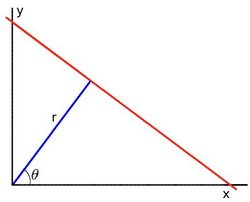

In [15]:
Image('polar.jpg')

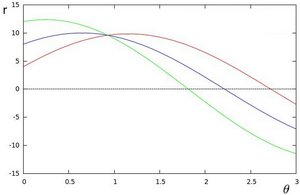

In [16]:
Image('intersecting.jpg')

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [74]:
img = cv2.imread("gridlines.jpg")


In [75]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [79]:
edges = cv2.Canny(img_gray, 70, 150, apertureSize = 3)


In [95]:
lines_list =[]
lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=100, # Min number of votes for valid line
            minLineLength=900, # Min allowed length of line
            maxLineGap=3 # Max allowed gap between line for joining them
            )

In [96]:
for points in lines:
      
    x1,y1,x2,y2=points[0]
    
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    
    lines_list.append([(x1,y1),(x2,y2)])

In [98]:
cv2.imwrite("line_detection.png", img)

True

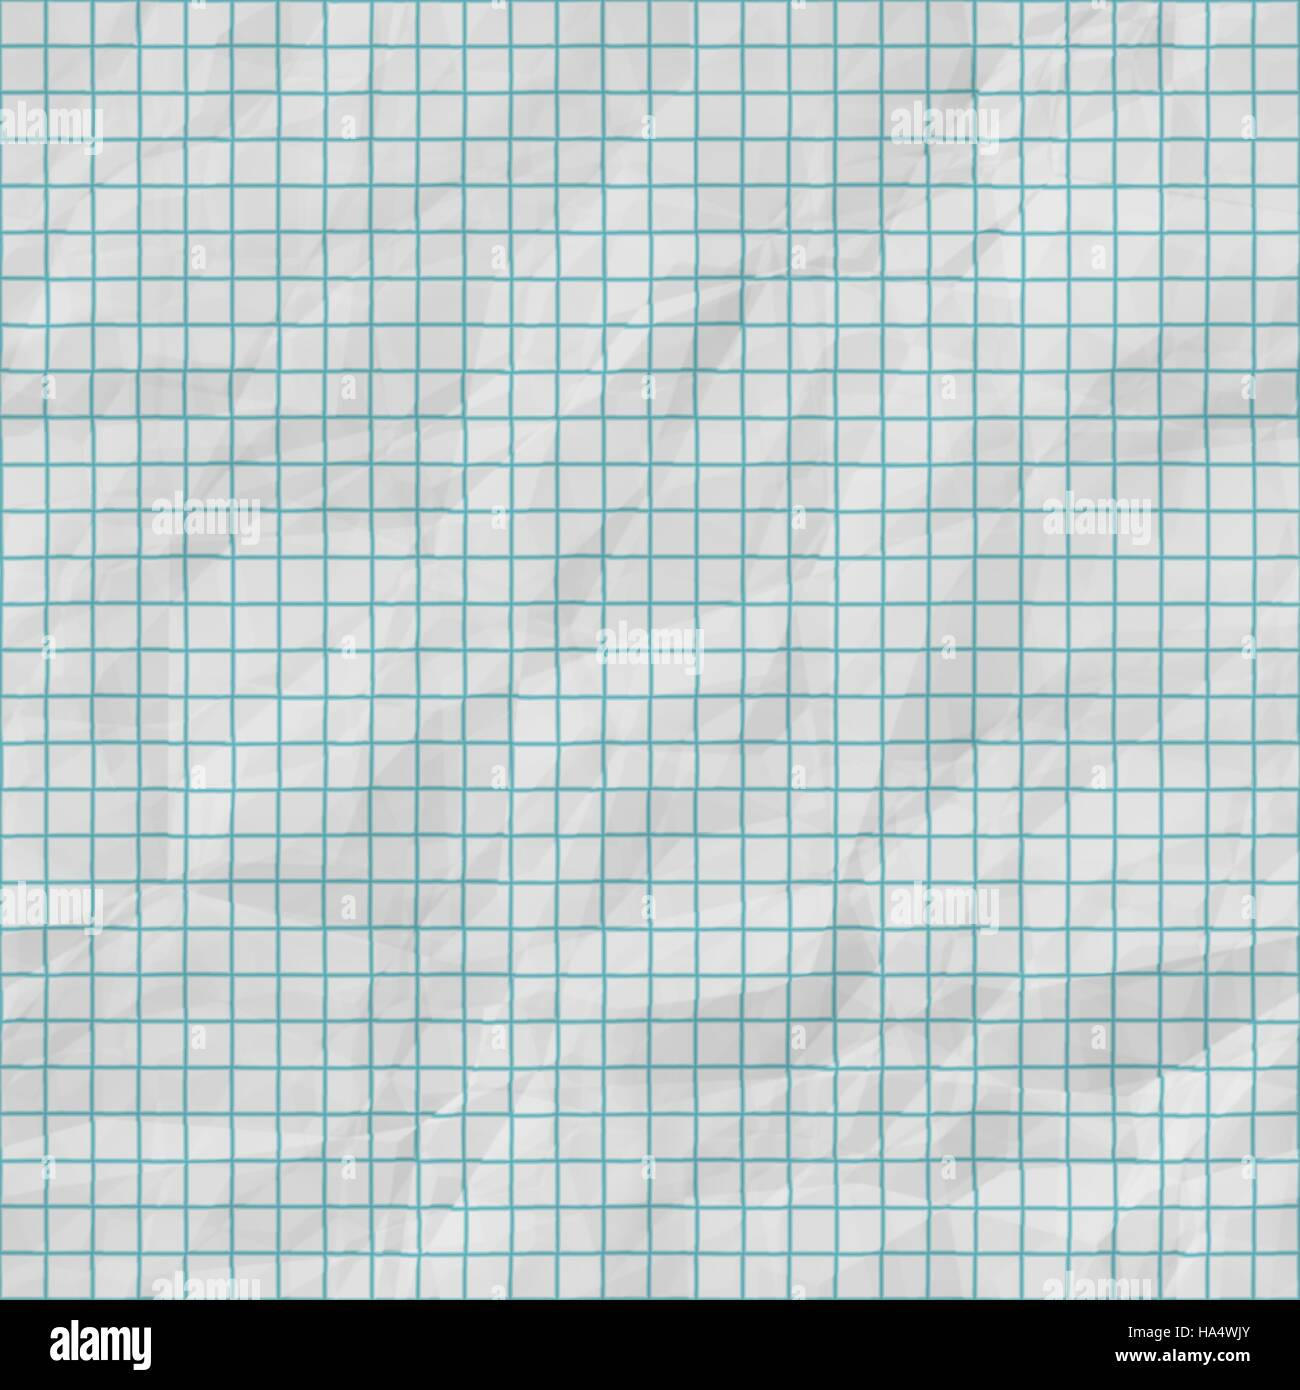

In [106]:
from IPython.display import Image

Image("gridlines.jpg")



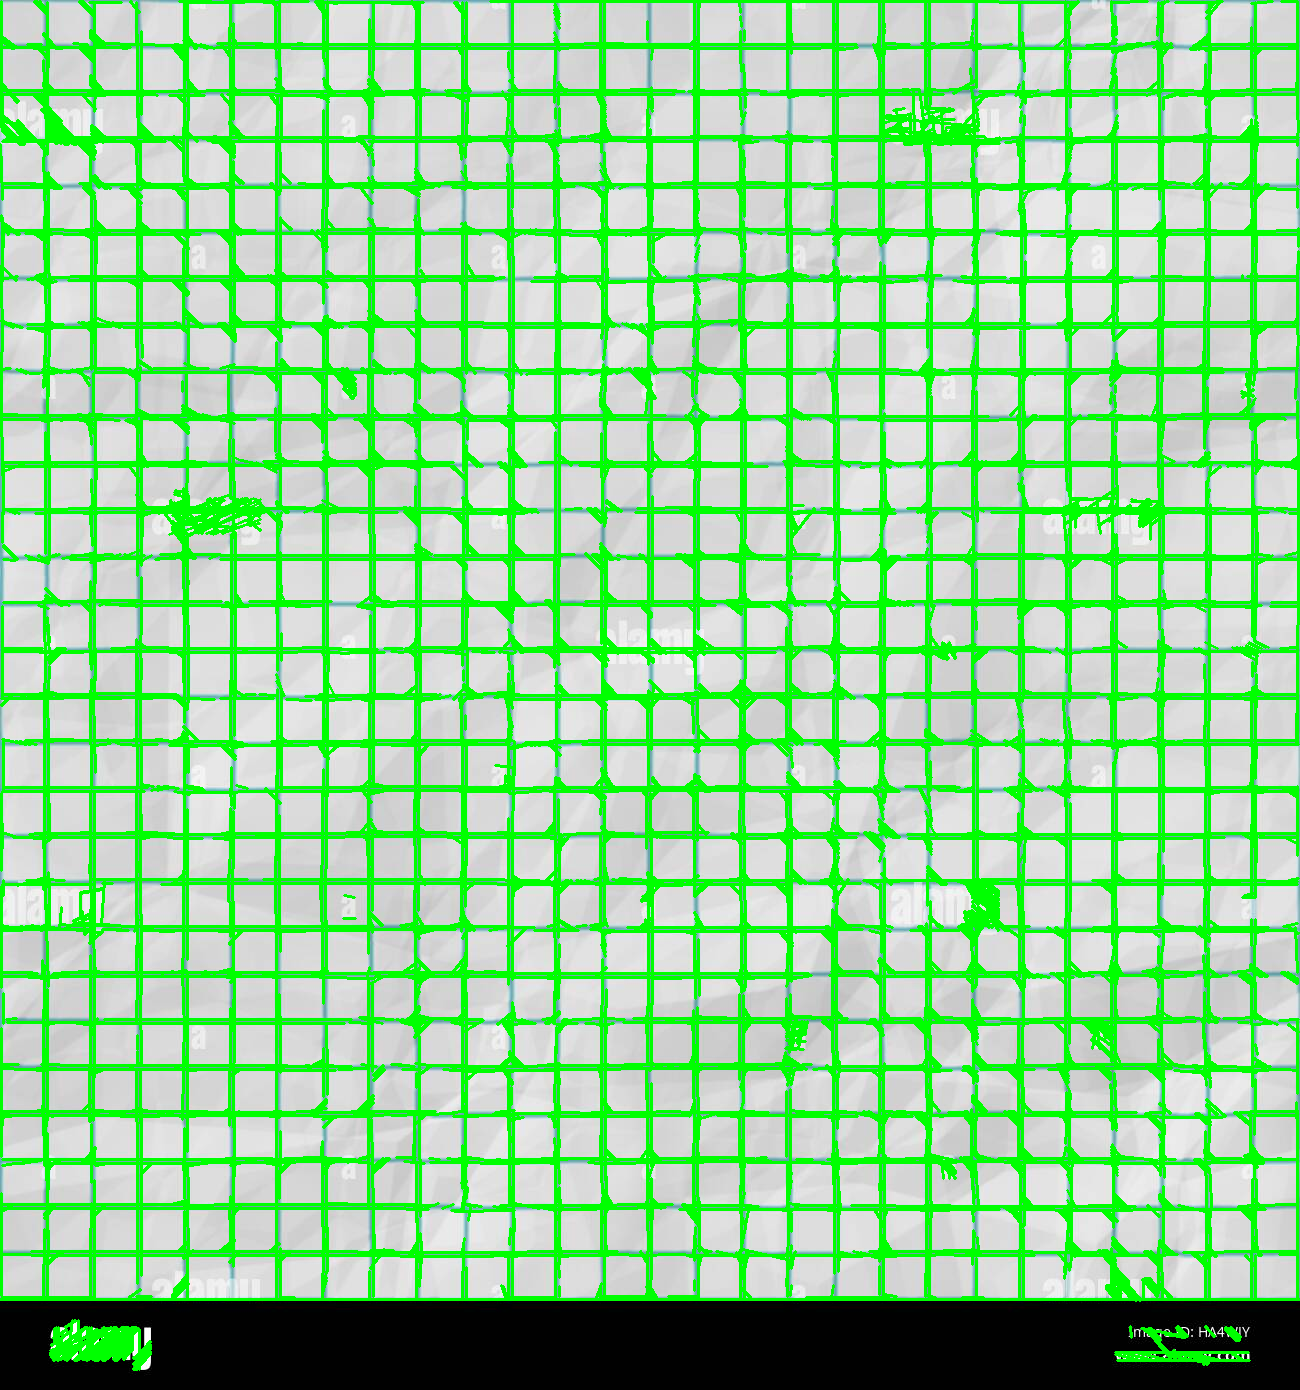

In [102]:
Image('line_detection.png')

# CIRCLE DETECTION USING HOUGH GRADIENT METHOD

- Analogous to Hough Line Method
- Instead of finding (r, ϴ), we find (a, b, r)

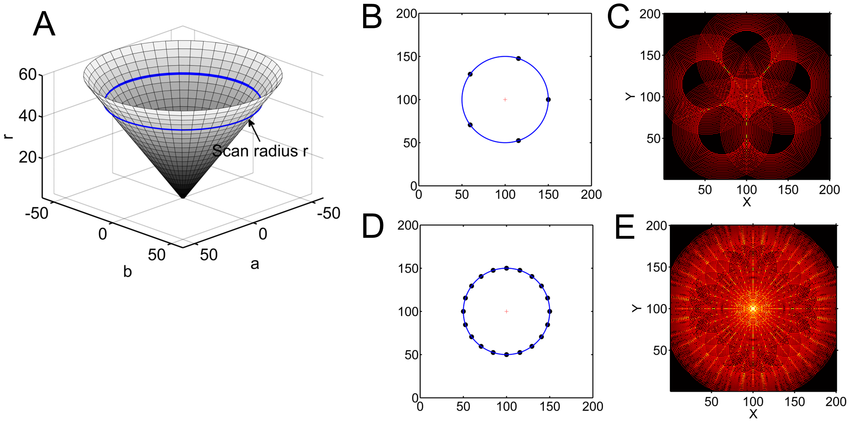

In [14]:
Image('hough-circle-transform.png')

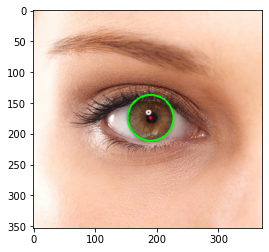

In [11]:
img = cv2.imread('eye-iris.png', cv2.IMREAD_COLOR) 

# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
  
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
               param2 = 30, minRadius = 50, maxRadius = 100) 
  

if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Circumference. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
  
        # Centre. 
        cv2.circle(img, (a, b), 1, (255, 0, 255), 3) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')

# CORNER DETECTION

We have:

M = w(x, y) * [[Ix^2   IxIy] [IxIy    Iy^2]]

where w(x, y) = window function
    Ix = Sobel gradient in X direction
    Iy = Sobel gradient in y direction
    
    d1 and d2 will be eigen values of M.
    
    
Using these values R score is calculated and if it is greater than a given threshold, corners are detected.

# Harris corner detection

R = | M | - k[trace(M)]^2

where k => 0.02 to 0.06

| M | = d1 * d2

trace(M) = d1 + d2

In [113]:
def harris_corners(img_path, k = 0.04, quality_factor=0.001):
    
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    #Conversion to float is a prerequisite for the algorithm
    gray_img = np.float32(gray_img)
    
    # 3 is the size of the kernel considered, aperture parameter = 3: used to calculate Sobel Gradient
    
    corners_img = cv2.cornerHarris(gray_img,3,3,k)
    
    #Marking the corners in Green
    image[corners_img > quality_factor*corners_img.max()] = [255,0,255]

    return image

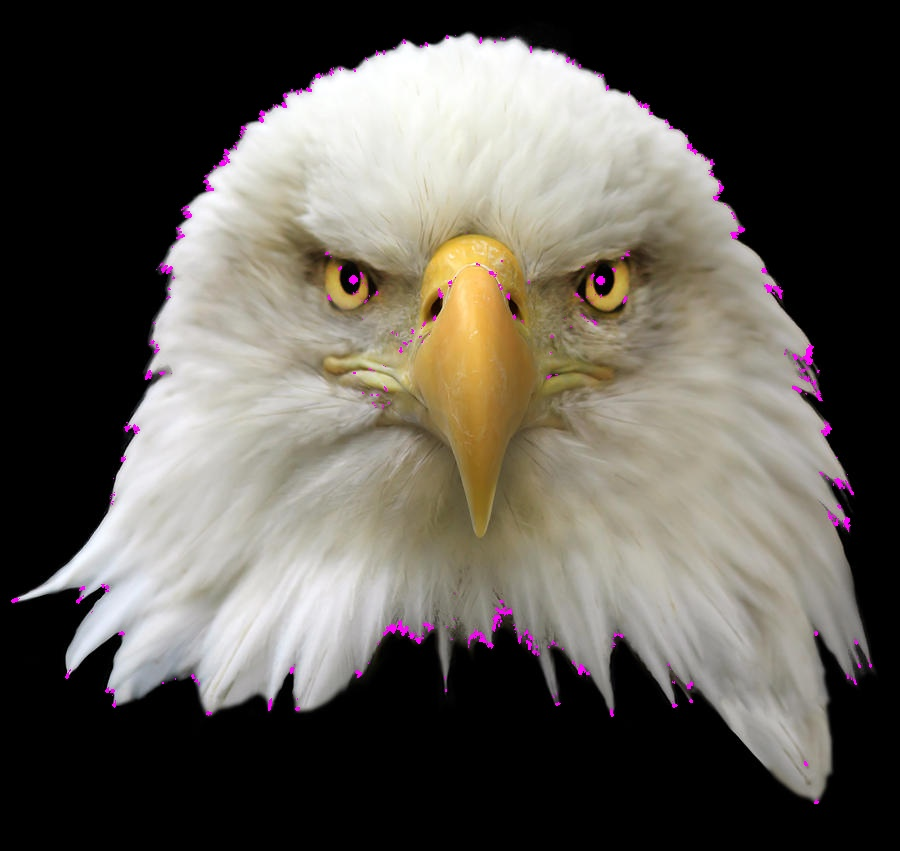

In [119]:
harris_img = harris_corners('eagle.jpg', k = 0.02)
cv2.imwrite("harris_corner_eagle.jpg", harris_img)
Image("harris_corner_eagle.jpg")

# Shi-Tomasi Detector

**R = min( d1, d2 )**

In [120]:
def shi_tomasi(img_path):
    
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    #Converting to grayscale
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    #1000 = max number of corners
    # 0.01 = minimum quality level below which the corners are rejected
    # 10 = minimum euclidean distance between two corners
    corners_img = cv2.goodFeaturesToTrack(gray_img,1000,0.01,10)
    
    corners_img = np.int0(corners_img)

    for corners in corners_img:
       
        x,y = corners.ravel()
        #Circling the corners in green
        cv2.circle(image,(x,y),3,[0,255,0],-1)

    return image

In [121]:
shi_tomasi_img = shi_tomasi('eagle.jpg')
cv2.imwrite('shi_tomasi_eagle.jpg', shi_tomasi_img)

True

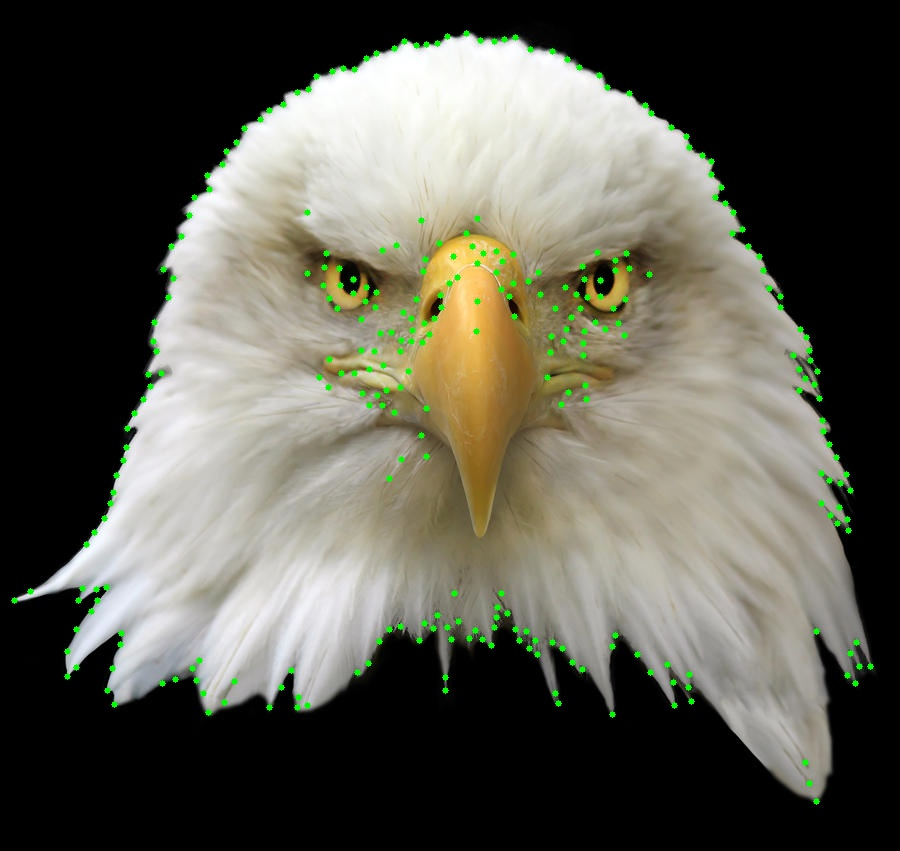

In [122]:
Image('shi_tomasi_eagle.jpg')

# FINDING CIRCLES AND ELLIPSES USING SIMPLEBLOBDETECTOR


Conditions checked are:

- Area (Avoid identification of small dots)
- Circularity = 4 * PI * (Area) /(Perimeter)^2
- Convexity (Outer Curvature)
- Inertia (Similarity to being a circle, Inertia of circle = 1)

In [27]:
image = cv2.imread('blobs.png', 0) 
  
# Set our filtering parameters 
# Initialize parameter setting using cv2.SimpleBlobDetector 
params = cv2.SimpleBlobDetector_Params() 
  
# Set Area filtering parameters 
params.filterByArea = True
params.minArea = 25
  
# Set Circularity filtering parameters 
params.filterByCircularity = True 
params.minCircularity = 0.9
  
# Set Convexity filtering parameters 
params.filterByConvexity = True
params.minConvexity = 0.2
      
# Set inertia filtering parameters 
params.filterByInertia = True
params.minInertiaRatio = 0.01
  
# Create a detector with the parameters 
detector = cv2.SimpleBlobDetector_create(params) 
      
# Detect blobs 
keypoints = detector.detect(image) 
  
# Draw blobs on our image as red circles 
blank = np.zeros((1, 1))  
blobs = cv2.drawKeypoints(image, keypoints, blank, (255, 0, 255), 
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
  
number_of_blobs = len(keypoints) 
text = "Number of Circular Blobs: " + str(len(keypoints)) 
cv2.putText(blobs, text, (20, 550), 
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2) 

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]]

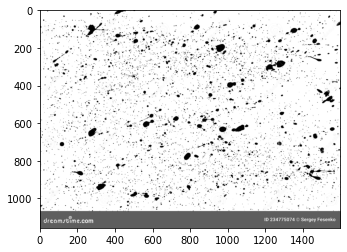

In [28]:
plt.imshow(image, cmap = 'gray')

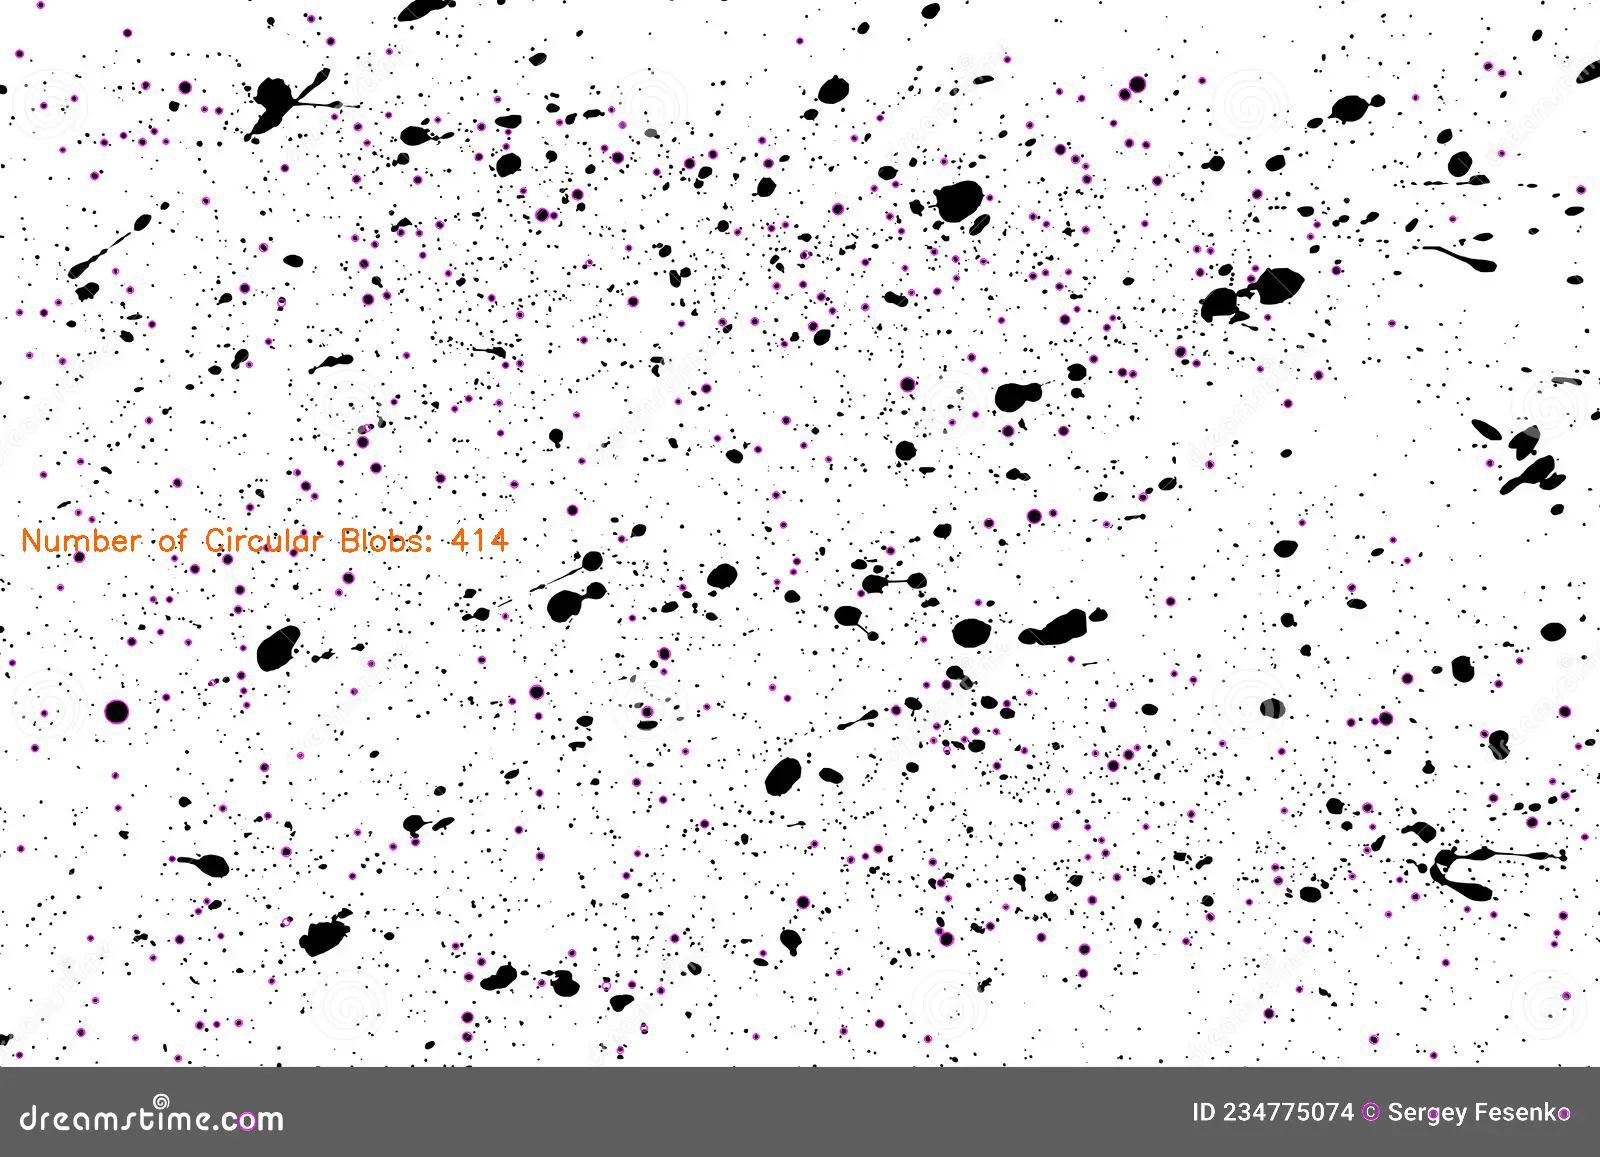

In [29]:
cv2.imwrite("blobs_out.png", blobs)
Image("blobs_out.png")